In [2]:
import tensorflow as tf
from keras.models import load_model
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt



In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = './Training'
valid_path = './Testing'



In [4]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  


In [5]:
 
  # useful for getting number of classes
folders = glob('./Training/*')
  

# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [6]:

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [7]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)



In [8]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 444 images belonging to 17 classes.
Found 84 images belonging to 17 classes.


In [9]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
14/14 [==============================] - 180s 13s/step - loss: 2.3336 - accuracy: 0.4568 - val_loss: 0.4813 - val_accuracy: 0.8690
Epoch 2/5
14/14 [==============================] - 190s 14s/step - loss: 0.3949 - accuracy: 0.8919 - val_loss: 0.1399 - val_accuracy: 0.9762
Epoch 3/5
14/14 [==============================] - 189s 13s/step - loss: 0.0953 - accuracy: 0.9766 - val_loss: 0.0884 - val_accuracy: 0.9881
Epoch 4/5
14/14 [==============================] - 183s 13s/step - loss: 0.0336 - accuracy: 0.9964 - val_loss: 0.0355 - val_accuracy: 0.9881
Epoch 5/5
14/14 [==============================] - 180s 13s/step - loss: 0.0247 - accuracy: 0.9957 - val_loss: 0.0253 - val_accuracy: 1.0000


In [10]:
model.save('model.h5')

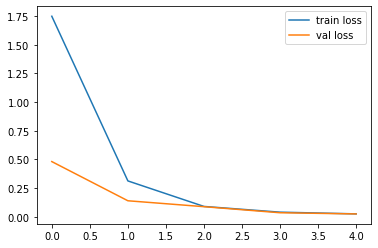

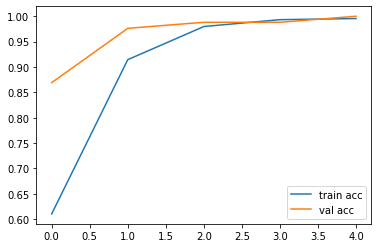

<Figure size 432x288 with 0 Axes>

In [11]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
